In [137]:
import pandas as pd
import numpy as np
# from google.colab import files
# uploaded_files = files.upload()
##from google.colab import drive

!pip freeze

anyio==3.6.2
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.1.0
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
brotlipy==0.7.0
certifi==2022.5.18.1
cffi @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/croot-jgj0vmyy/cffi_1642701117808/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click==8.1.3
conda==4.12.0
conda-content-trust @ file:///tmp/build/80754af9/conda-content-trust_1617045594566/work
conda-package-handling @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_croot-4sc96bd_/conda-package-handling_1649105290173/work
contourpy==1.0.6
cryptography @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_5871d1ea-0250-4cd7-ac89-4b1e60514f5daqk8t0ow/croots/recipe/cryptography_1652101128666/work
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.6
entrypoints==0.4
executing==1.2.0
fastjsonschema==2.16.2

In [3]:
#READ IN DATA

AsteroidDFs = []
for i in range(1, 21):
  Asteroid = pd.read_csv("/Users/anishkarthik/Desktop/Projects/HackUTD2022/EOG/Asteroids/Asteroid {}.csv".format(i))
  Asteroid = Asteroid.dropna()
  AsteroidDFs.append(Asteroid)


In [4]:
print(AsteroidDFs[0].head())

   BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0     745.01               270.94      89.67                  52.50   
1     746.53               289.74     107.61                 114.19   
2     747.02               289.74     104.44                  98.99   
3     748.54               284.22     106.09                 121.55   
4     749.02               298.22     105.44                  93.13   

   WEIGHT_ON_BIT  DRILL_BIT_ID  DRILL_BIT_NAME  
0          10.96             1  Buzz Drilldrin  
1           3.01             1  Buzz Drilldrin  
2           5.04             1  Buzz Drilldrin  
3           3.69             1  Buzz Drilldrin  
4           3.28             1  Buzz Drilldrin  


In [5]:
#DROP ALL NULL VALUES FROM THE DEPTH COLUMN
firstdroppedDFs = []
for i in range(0, 20):
  droppedDF = AsteroidDFs[i].drop(AsteroidDFs[i][AsteroidDFs[i]["BIT_DEPTH"].isna()].index)
  firstdroppedDFs.append(droppedDF)
  droppedDF = droppedDF[droppedDF["BIT_DEPTH"] > 0]

  firstdroppedDFs[i] = firstdroppedDFs[i].reset_index(drop = True)
  #print(firstdroppedDFs[i].isna().any())
print(firstdroppedDFs[0].tail)

  


<bound method NDFrame.tail of        BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0         745.01               270.94      89.67                  52.50   
1         746.53               289.74     107.61                 114.19   
2         747.02               289.74     104.44                  98.99   
3         748.54               284.22     106.09                 121.55   
4         749.02               298.22     105.44                  93.13   
...          ...                  ...        ...                    ...   
17353   20623.01               111.57     160.99                 740.59   
17354   20624.51               135.07     158.08                 778.77   
17355   20626.53               130.31     156.74                 849.57   
17356   20627.01               124.45     155.66                 860.88   
17357   20628.53               120.37     155.91                 904.00   

       WEIGHT_ON_BIT  DRILL_BIT_ID   DRILL_BIT_NAME  
0              

In [6]:
#CALCULATE AND ADD DISTANCE AND TOTAL DISTANCE COLUMNS
for i in range(0, 20):
  distances = [0]
  totalDistances = [0]
  total_distance_sum = 0
  print(i)
  for j in range(1, len(firstdroppedDFs[i].index)):
    distances.append(firstdroppedDFs[i]["BIT_DEPTH"][j] - firstdroppedDFs[i]["BIT_DEPTH"][j - 1])
    totalDistances.append(sum(distances))
  firstdroppedDFs[i]["Distances"] = distances
  firstdroppedDFs[i]["totalDistance"] = totalDistances  
  droppedDF = AsteroidDFs[i].drop(AsteroidDFs[i][AsteroidDFs[i]["BIT_DEPTH"].isna()].index)
  firstdroppedDFs[i] = firstdroppedDFs[i].reset_index(drop = True)
  firstdroppedDFs[i] = firstdroppedDFs[i].reset_index(drop = True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [7]:
print(firstdroppedDFs[0].tail)
print(firstdroppedDFs[i].isna().any())

<bound method NDFrame.tail of        BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0         745.01               270.94      89.67                  52.50   
1         746.53               289.74     107.61                 114.19   
2         747.02               289.74     104.44                  98.99   
3         748.54               284.22     106.09                 121.55   
4         749.02               298.22     105.44                  93.13   
...          ...                  ...        ...                    ...   
17353   20623.01               111.57     160.99                 740.59   
17354   20624.51               135.07     158.08                 778.77   
17355   20626.53               130.31     156.74                 849.57   
17356   20627.01               124.45     155.66                 860.88   
17357   20628.53               120.37     155.91                 904.00   

       WEIGHT_ON_BIT  DRILL_BIT_ID   DRILL_BIT_NAME  Distances  total

In [8]:
#DROP ALL NULL AND 0 VALUES OF RATE_OF_PENETRATION
# HOOK_LOAD                     True
# DIFFERENTIAL_PRESSURE         True
# WEIGHT_ON_BIT 
droppedDFs = []
for i in range(0, 20):
  droppedDF = firstdroppedDFs[i].drop(firstdroppedDFs[i][firstdroppedDFs[i]["RATE_OF_PENETRATION"] == 0].index, inplace = True)
  droppedDF = firstdroppedDFs[i].drop(firstdroppedDFs[i][firstdroppedDFs[i]["RATE_OF_PENETRATION"].isna()].index)
  droppedDF = firstdroppedDFs[i].drop(firstdroppedDFs[i][firstdroppedDFs[i]["HOOK_LOAD"].isna()].index)
  droppedDF = firstdroppedDFs[i].drop(firstdroppedDFs[i][firstdroppedDFs[i]["DIFFERENTIAL_PRESSURE"].isna()].index)

  droppedDF = firstdroppedDFs[i].drop(firstdroppedDFs[i][firstdroppedDFs[i]["WEIGHT_ON_BIT"].isna()].index)

  droppedDFs.append(droppedDF)

  droppedDFs[i] = droppedDFs[i].reset_index(drop = True)
print(droppedDFs[0].head)


<bound method NDFrame.head of        BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0         745.01               270.94      89.67                  52.50   
1         746.53               289.74     107.61                 114.19   
2         747.02               289.74     104.44                  98.99   
3         748.54               284.22     106.09                 121.55   
4         749.02               298.22     105.44                  93.13   
...          ...                  ...        ...                    ...   
17284   20623.01               111.57     160.99                 740.59   
17285   20624.51               135.07     158.08                 778.77   
17286   20626.53               130.31     156.74                 849.57   
17287   20627.01               124.45     155.66                 860.88   
17288   20628.53               120.37     155.91                 904.00   

       WEIGHT_ON_BIT  DRILL_BIT_ID   DRILL_BIT_NAME  Distances  total

In [9]:
#CALCULATE AND ADD TIME AND TOTAL TIME COLUMNS
for i in range(0, 20):
  times = [0]
  totalTimes = [0]
  print(i)


  for j in range(1, len(droppedDFs[i].index)):
    add = droppedDFs[i]["Distances"][j] / droppedDFs[i]["RATE_OF_PENETRATION"][j]
    times.append(add)
    if droppedDFs[i]["RATE_OF_PENETRATION"][j] ==0:
      print(i, j)
    if sum(times) == None:
      print(i, j)
    totalTimes.append(sum(times))
  droppedDFs[i]["Time"] = times
  droppedDFs[i]["totalTime"] = totalTimes  
droppedDF = droppedDFs[i].drop(droppedDFs[i][droppedDFs[i]["Time"] == 0].index, inplace = True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
#ADD ASTEROID NUMBER TO EACH DATAFRAME
for i in range(0, 20):
  a = np.empty(len(droppedDFs[i].index))
  a.fill(i + 1)

  droppedDFs[i]["asteroid"] =  a
print(droppedDFs[i])



       BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
1         115.12                573.9       60.7                  717.0   
2         116.63                668.7       60.6                  720.0   
3         118.65                644.5       60.7                  698.0   
4         119.31                657.9       60.9                  719.0   
5         121.12                694.2       60.7                  727.0   
...          ...                  ...        ...                    ...   
20196   22579.01                164.2      154.3                  895.0   
20197   22580.51                149.8      151.9                 1085.0   
20198   22581.04                144.6      151.2                 1166.0   
20199   22582.54                146.4      149.8                 1240.0   
20200   22583.02                140.7      149.9                 1252.0   

       WEIGHT_ON_BIT  DRILL_BIT_ID  DRILL_BIT_NAME  Distances  totalDistance  \
1               0.9

In [11]:
print(droppedDFs[19]["Distances"])

1        2.04
2        1.51
3        2.02
4        0.66
5        1.81
         ... 
20196    0.50
20197    1.50
20198    0.53
20199    1.50
20200    0.48
Name: Distances, Length: 20200, dtype: float64


In [12]:
for i in range(0, 20):
  print(i)
  costs = []
  finalCosts = []
  for j in range(len(droppedDFs[i].index)):
    depth = droppedDFs[i]["Distances"].iloc[j]
    hours = droppedDFs[i]["Time"].iloc[j]
    if droppedDFs[i]["DRILL_BIT_NAME"].iloc[j] == "Buzz Drilldrin":
      costPerRun = 5000
      costPerFoot = 1.5
      costPerHour = 0
    elif droppedDFs[i]["DRILL_BIT_NAME"].iloc[j]== "AstroBit":
      costPerRun = 3000
      costPerFoot = 1
      costPerHour = 1500
    elif droppedDFs[i]["DRILL_BIT_NAME"].iloc[j] == "Apollo":
      costPerRun = 1000
      costPerFoot = 4
      costPerHour = 2500
    elif droppedDFs[i]["DRILL_BIT_NAME"].iloc[j] == "ChallengDriller":
      costPerRun = 10000
      costPerFoot = 0
      costPerHour = 0
    # else:
    #   print(droppedDFs[i]["DRILL_BIT_NAME"].iloc[j])
    cost = costPerRun + (depth * costPerFoot) + hours * (costPerHour)
    costs.append(cost)
    finalCosts.append(sum(costs))
  droppedDFs[i]["cost"] = costs
  droppedDFs[i]["totalCost"] = finalCosts
  print(droppedDFs[i]["totalCost"])

0
0        5.000000e+03
1        1.000228e+04
2        1.500301e+04
3        2.000529e+04
4        2.500601e+04
             ...     
17284    9.850996e+07
17285    9.851996e+07
17286    9.852996e+07
17287    9.853996e+07
17288    9.854996e+07
Name: totalCost, Length: 17289, dtype: float64
1
0       1.000000e+03
1       2.006370e+03
2       3.028240e+03
3       4.066769e+03
4       5.096129e+03
            ...     
9200    9.684349e+06
9201    9.685610e+06
9202    9.686693e+06
9203    9.687942e+06
9204    9.689093e+06
Name: totalCost, Length: 9205, dtype: float64
2
0        1.000000e+03
1        2.004983e+03
2        3.019408e+03
3        4.023185e+03
4        5.032988e+03
             ...     
11593    3.275531e+07
11594    3.275832e+07
11595    3.276135e+07
11596    3.276436e+07
11597    3.276738e+07
Name: totalCost, Length: 11598, dtype: float64
3
0        1.000000e+04
1        2.000000e+04
2        3.000000e+04
3        4.000000e+04
4        5.000000e+04
             ...     
15332

In [13]:
print(droppedDFs[0].columns)

Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'Distances', 'totalDistance', 'Time', 'totalTime',
       'asteroid', 'cost', 'totalCost'],
      dtype='object')


In [14]:
#print(droppedDFs[i])
EconomicDrilling = []
for i in droppedDFs:

  #print(i.columns)
  EconomicDrilling.append(i["totalCost"].iloc[-1] / i["totalDistance"].iloc[-1])
mostEconomiclyDrilledAsteroid = 1 + EconomicDrilling.index(min(EconomicDrilling))
print(EconomicDrilling)
print("For price and depth:", mostEconomiclyDrilledAsteroid)

[4956.363922446587, 715.6743872703188, 1817.9992149216716, 5977.63549957623, 4464.471887448497, 2284.532943953715, 3803.033749317028, 3894.15368578848, 2420.2576358301794, 6607.010484412142, 3166.3746941576796, 6156.2913028980065, 3027.082878521927, 3986.5709447195572, 5012.931749882771, 5699.458197571997, 1837.9954723168173, 3220.444712633962, 4384.790598158609, 4722.4489496910455]
For price and depth: 2


In [15]:
#DEFINE FUNCTION TO FIND ANY EFFICIENT COMBO OF TAGS
def findEconomicAsteroid(tag1, tag2, DFs):
  EconomicDrilling = []
  for i in droppedDFs:
    EconomicDrilling.append(i[tag1].iloc[-1] / i[tag2].iloc[-1])
  return (1 + EconomicDrilling.index(min(EconomicDrilling)))


In [16]:
print(findEconomicAsteroid("totalCost", "totalDistance", droppedDFs))


2


In [17]:
for i in droppedDFs:
  print(i)

       BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0         745.01               270.94      89.67                  52.50   
1         746.53               289.74     107.61                 114.19   
2         747.02               289.74     104.44                  98.99   
3         748.54               284.22     106.09                 121.55   
4         749.02               298.22     105.44                  93.13   
...          ...                  ...        ...                    ...   
17284   20623.01               111.57     160.99                 740.59   
17285   20624.51               135.07     158.08                 778.77   
17286   20626.53               130.31     156.74                 849.57   
17287   20627.01               124.45     155.66                 860.88   
17288   20628.53               120.37     155.91                 904.00   

       WEIGHT_ON_BIT  DRILL_BIT_ID   DRILL_BIT_NAME  Distances  totalDistance  \
0              10.

In [18]:
track_bit_efficiency = np.array(len(droppedDFs))
bitList = ["Apollo", "ChallengDriller", "AstroBit", "Buzz Drilldrin"]
Apollo = []
ChallengDriller = []
Astro_Bit = []
Buzz_Drilldrin = []
for i in droppedDFs:
  for j in bitList:
    viewBit = i[i["DRILL_BIT_NAME"] == j]
    bitTempSum = []
    realBitEfficiency = None
    for k in np.unique(viewBit["DRILL_BIT_ID"]):
      

      superViewBit = viewBit[viewBit["DRILL_BIT_ID"] == k]

      bitDist = superViewBit["totalDistance"].iloc[-1] - superViewBit["totalDistance"].iloc[0]
      bitTime = superViewBit["totalTime"].iloc[-1] - superViewBit["totalTime"].iloc[0]
      tempbitEfficiency = bitDist / bitTime
      bitTempSum.append(tempbitEfficiency)
      if len(bitTempSum) > 0 and bitTime > 0:
        #realBitEfficiency = sum(bitTempSum) / len(bitTempSum)
      #if realBitEfficiency != None:
        if j == "Apollo":
          Apollo.append(bitTempSum)
        if j == "ChallengDriller":
          ChallengDriller.append(bitTempSum)
        if j == "AstroBit":
          Astro_Bit.append(bitTempSum)
        if j == "Buzz Drilldrin":
          Buzz_Drilldrin.append(bitTempSum)
        
for i in [Apollo, ChallengDriller, Astro_Bit, Buzz_Drilldrin]:
  
  i = [item for sublist in i for item in sublist]

  print(sum(i)/ len(i))

174.22264410056124
112.4198986859013
142.9624256942822
129.04378715372738


/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/906968819.py:19: RuntimeWarning: invalid value encountered in double_scalars
  tempbitEfficiency = bitDist / bitTime


In [19]:
for i in droppedDFs:
  efficiency = [0]
  for j in range(1, len(i.index)):
    tempDist = i["totalDistance"].iloc[j] - i["totalDistance"].iloc[j-1]
    tempTime = i["totalTime"].iloc[j] - i["totalTime"].iloc[j-1]
    if tempDist/tempTime < 0:
      print(i.iloc[j], i.iloc[j - 1])

    efficiency.append(tempDist/tempTime)
  i["CurrentEfficiency"] = efficiency
  i = i.dropna()

BIT_DEPTH                        -999.25
RATE_OF_PENETRATION              -999.25
HOOK_LOAD                        -999.25
DIFFERENTIAL_PRESSURE            -999.25
WEIGHT_ON_BIT                    -999.25
DRILL_BIT_ID                           4
DRILL_BIT_NAME           ChallengDriller
Distances                      -20215.77
totalDistance                   -1744.26
Time                           20.230943
totalTime                     278.602517
asteroid                             1.0
cost                             10000.0
totalCost                87149961.179245
Name: 16148, dtype: object BIT_DEPTH                       19216.52
RATE_OF_PENETRATION               133.56
HOOK_LOAD                         161.86
DIFFERENTIAL_PRESSURE             789.16
WEIGHT_ON_BIT                      33.34
DRILL_BIT_ID                           4
DRILL_BIT_NAME           ChallengDriller
Distances                           2.49
totalDistance                   18471.51
Time                          

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)


BIT_DEPTH                       1642.72
RATE_OF_PENETRATION               613.8
HOOK_LOAD                          76.4
DIFFERENTIAL_PRESSURE             576.0
WEIGHT_ON_BIT                      38.1
DRILL_BIT_ID                          1
DRILL_BIT_NAME                 AstroBit
Distances                          -0.6
totalDistance                   1541.74
Time                          -0.000978
totalTime                      3.406948
asteroid                            7.0
cost                        2997.933724
totalCost                1950255.272542
Name: 647, dtype: object BIT_DEPTH                       1634.55
RATE_OF_PENETRATION               697.9
HOOK_LOAD                          84.3
DIFFERENTIAL_PRESSURE             283.0
WEIGHT_ON_BIT                      27.9
DRILL_BIT_ID                          1
DRILL_BIT_NAME                 AstroBit
Distances                          2.45
totalDistance                   1533.57
Time                           0.003511
totalTime      

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_

BIT_DEPTH                     -999.25
RATE_OF_PENETRATION           -999.25
HOOK_LOAD                     -999.25
DIFFERENTIAL_PRESSURE         -999.25
WEIGHT_ON_BIT                 -999.25
DRILL_BIT_ID                        1
DRILL_BIT_NAME               AstroBit
Distances                    -1110.51
totalDistance                -1001.98
Time                         1.111344
totalTime                     1.40245
asteroid                         10.0
cost                      3556.505261
totalCost                88101.694851
Name: 28, dtype: object BIT_DEPTH                      111.26
RATE_OF_PENETRATION             542.0
HOOK_LOAD                        64.4
DIFFERENTIAL_PRESSURE             9.0
WEIGHT_ON_BIT                     0.0
DRILL_BIT_ID                        1
DRILL_BIT_NAME               AstroBit
Distances                        0.66
totalDistance                  108.53
Time                         0.001218
totalTime                    0.291106
asteroid                  

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)


BIT_DEPTH                        -999.25
RATE_OF_PENETRATION              -999.25
HOOK_LOAD                        -999.25
DIFFERENTIAL_PRESSURE            -999.25
WEIGHT_ON_BIT                    -999.25
DRILL_BIT_ID                           4
DRILL_BIT_NAME                  AstroBit
Distances                      -22275.75
totalDistance                   -2251.96
Time                           22.292469
totalTime                     211.670626
asteroid                            17.0
cost                        14162.954028
totalCost                34082214.228598
Name: 19648, dtype: object BIT_DEPTH                       21276.5
RATE_OF_PENETRATION                39.5
HOOK_LOAD                         155.1
DIFFERENTIAL_PRESSURE             783.0
WEIGHT_ON_BIT                     48.39
DRILL_BIT_ID                          4
DRILL_BIT_NAME                 AstroBit
Distances                          1.48
totalDistance                  20023.79
Time                           0.037468

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)


BIT_DEPTH                        -999.25
RATE_OF_PENETRATION              -999.25
HOOK_LOAD                        -999.25
DIFFERENTIAL_PRESSURE            -999.25
WEIGHT_ON_BIT                    -999.25
DRILL_BIT_ID                           4
DRILL_BIT_NAME            Buzz Drilldrin
Distances                      -18239.25
totalDistance                   -1137.82
Time                            18.25294
totalTime                     103.589186
asteroid                            18.0
cost                          -22358.875
totalCost                40981018.797059
Name: 15700, dtype: object BIT_DEPTH                        17240.0
RATE_OF_PENETRATION                 26.2
HOOK_LOAD                          133.4
DIFFERENTIAL_PRESSURE               92.0
WEIGHT_ON_BIT                       37.8
DRILL_BIT_ID                           4
DRILL_BIT_NAME            Buzz Drilldrin
Distances                            1.0
totalDistance                   17101.43
Time                          

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if tempDist/tempTime < 0:
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/969756068.py:9: RuntimeWarning: invalid value encountered in double_scalars
  efficiency.append(tempDist/tempTime)


In [20]:
for i in droppedDFs:
  efficiency = [0]
  for j in range(1, len(i.index)):
    tempDist = i["totalDistance"].iloc[j] - i["totalDistance"].iloc[j-1]
    tempCost = i["totalCost"].iloc[j] - i["totalCost"].iloc[j-1]
    efficiency.append(tempCost/tempDist)
  i["CurrentEconomicEfficiency"] = efficiency

/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  efficiency.append(tempCost/tempDist)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  efficiency.append(tempCost/tempDist)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  efficiency.append(tempCost/tempDist)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  efficiency.append(tempCost/tempDist)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  efficiency.append(tempCost/tempDist)
/var/folders/gy/glf1wklx3zg9xslrqsh74pk40000gn/T/ipykernel_69112/2991849185.py:6: RuntimeW

In [21]:
allAsteroidDF = pd.DataFrame()
asteroidNumber = []
for i in range(0, 20):
    allAsteroidDF = pd.concat([allAsteroidDF, droppedDFs[i]])


In [22]:
allAsteroidDF.head()

BIT_DEPTH  RATE_OF_PENETRATION  HOOK_LOAD  DIFFERENTIAL_PRESSURE  \
0     745.01               270.94      89.67                  52.50   
1     746.53               289.74     107.61                 114.19   
2     747.02               289.74     104.44                  98.99   
3     748.54               284.22     106.09                 121.55   
4     749.02               298.22     105.44                  93.13   

   WEIGHT_ON_BIT  DRILL_BIT_ID  DRILL_BIT_NAME  Distances  totalDistance  \
0          10.96             1  Buzz Drilldrin       0.00           0.00   
1           3.01             1  Buzz Drilldrin       1.52           1.52   
2           5.04             1  Buzz Drilldrin       0.49           2.01   
3           3.69             1  Buzz Drilldrin       1.52           3.53   
4           3.28             1  Buzz Drilldrin       0.48           4.01   

       Time  totalTime  asteroid      cost  totalCost  CurrentEfficiency  \
0  0.000000   0.000000       1.0  5000.000   5000.000               0.00   
1  0.005246   0.005246       1.0  5002.280  10002.280             289.74   
2  0.001691   0.006937       1.0  5000.735  15003.015             289.74   
3  0.005348   0.012285       1.0  5002.280  20005.295             284.22   
4  0.001610   0.013895       1.0  5000.720  25006.015             298.22   

   CurrentEconomicEfficiency  
0                   0.000000  
1                3290.973684  
2               10205.581633  
3                3290.973684  
4               10418.166667

In [23]:
allAsteroidDF = allAsteroidDF.dropna()
print(allAsteroidDF.isna().any())


BIT_DEPTH                    False
RATE_OF_PENETRATION          False
HOOK_LOAD                    False
DIFFERENTIAL_PRESSURE        False
WEIGHT_ON_BIT                False
DRILL_BIT_ID                 False
DRILL_BIT_NAME               False
Distances                    False
totalDistance                False
Time                         False
totalTime                    False
asteroid                     False
cost                         False
totalCost                    False
CurrentEfficiency            False
CurrentEconomicEfficiency    False
dtype: bool


In [24]:
#print(allAsteroidDF)
#allAsteroidDF = allAsteroidDF.replace([np.inf, -np.inf], np.nan, inplace=True)
#allAsteroidDF.dropna()
encoded = []
for i in range(len(allAsteroidDF.index)):
    # print(type(allAsteroidDF["DRILL_BIT_NAME"].iloc[i]))
    if allAsteroidDF["DRILL_BIT_NAME"].iloc[i] == "Apollo":
        encoded.append(0)
    if allAsteroidDF["DRILL_BIT_NAME"].iloc[i] == "Buzz Drilldrin":
        encoded.append(1)
    if allAsteroidDF["DRILL_BIT_NAME"].iloc[i] == "ChallengDriller":
        encoded.append(2)
    if allAsteroidDF["DRILL_BIT_NAME"].iloc[i] == "AstroBit":
        encoded.append(3)
#print(encoded)
allAsteroidDF["DRILL_BIT_NAME"] = encoded
print(allAsteroidDF.isna().any())    

BIT_DEPTH                    False
RATE_OF_PENETRATION          False
HOOK_LOAD                    False
DIFFERENTIAL_PRESSURE        False
WEIGHT_ON_BIT                False
DRILL_BIT_ID                 False
DRILL_BIT_NAME               False
Distances                    False
totalDistance                False
Time                         False
totalTime                    False
asteroid                     False
cost                         False
totalCost                    False
CurrentEfficiency            False
CurrentEconomicEfficiency    False
dtype: bool


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
scale_y = StandardScaler()
import matplotlib.pyplot as plt

import math

X = allAsteroidDF.iloc[:-1,:-2]
Y = np.array(allAsteroidDF.iloc[:-1,-2:-1])
difference = sum(Y) / len(Y)
sortedY = sorted(Y)
difference = sortedY[int(.75 *len(Y))]
newY = []
for i in Y:
    if i > difference:
        newY.append(1)
    else:
        newY.append(0)
#print(newY)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X,newY)
import random
rand_list = []
for i in range(10000):
    rand_list.append(random.randint(0,len(newY)))

#Predict Output
predictions = []
for i in rand_list:
    predictions.append(model.predict([allAsteroidDF.iloc[i, :-2]])) # 0:Overcast, 2:Mild
#allAsteroidDF["NormalEfficiencyPrediction"] = predictions


X2 = allAsteroidDF.iloc[:-1,:-2]
Y2 = np.array(allAsteroidDF.iloc[:-1,-1])
difference2 = sum(Y2) / len(Y2)
newY2 = []
for i in Y2:
    if i > difference:
        newY2.append(1)
    else:
        newY2.append(0)
#print(newY)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model2.fit(X2,newY2)

predictions2 = []
for i in rand_list:
    predictions2.append(model2.predict([allAsteroidDF.iloc[i, :-2]])) 



from matplotlib.colors import ListedColormap
#plt.plot(allAsteroidDF[tag1], allAsteroidDF[tag1], c = predictions)
#print(predictions)

/Users/anishkarthik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/anishkarthik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/anishkarthik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/anishkarthik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/anishkarthik/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'Distances', 'totalDistance', 'Time', 'totalTime',
       'asteroid', 'cost', 'totalCost', 'CurrentEfficiency',
       'CurrentEconomicEfficiency'],
      dtype='object')


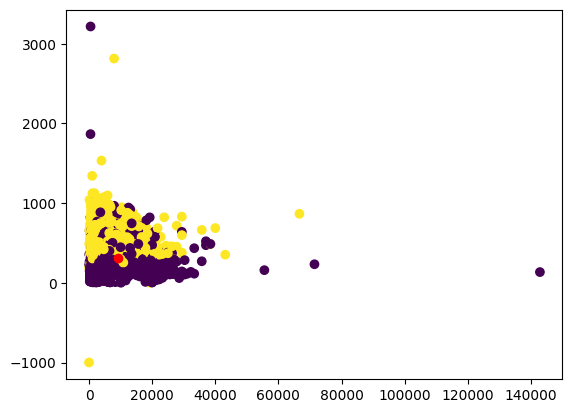

In [125]:
print(allAsteroidDF.columns)
tag1 = "CurrentEconomicEfficiency"
tag2 = "CurrentEfficiency"
efficiencyMetric = "EconomicEfficiencyPrediction"
 
pickFile = 333

xDisplay = []
yDisplay = []
for i in rand_list:
    xDisplay.append(allAsteroidDF[tag1].iloc[i])
    yDisplay.append(allAsteroidDF[tag2].iloc[i])
fig, ax = plt.subplots()
ax.set_xlabel = tag1
ax.set_ylabel = tag2
ax.scatter(xDisplay, yDisplay, c = predictions)
ax.scatter(allAsteroidDF[tag1].iloc[333], allAsteroidDF[tag2].iloc[333], c = "red")
plt.draw()

1000
[[2.00343294e-04 1.85972837e-05 2.38423989e-06 1.04973074e-04
  5.19250225e-06 0.00000000e+00 0.00000000e+00 1.72441971e-09
  2.00343294e-04 2.45978340e-10 6.37444118e-07 0.00000000e+00
  2.58662956e-09 9.99999954e-01]
 [9.36064843e-05 2.46377557e-02 2.38145379e-02 9.99025908e-01
  2.78037929e-02 0.00000000e+00 0.00000000e+00 5.35276476e-06
  9.36064843e-05 7.96924360e-08 5.82713032e-05 0.00000000e+00
  8.02914714e-06 1.05492628e-04]
 [6.00385630e-04 9.99678429e-01 5.09966520e-03 2.47085547e-02
  2.40633539e-03 1.32348898e-23 0.00000000e+00 4.07381126e-05
  6.00385630e-04 1.53597727e-05 4.09672236e-05 0.00000000e+00
  6.11071689e-05 1.57566950e-05]]
Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'Distances', 'totalDistance', 'Time', 'totalTime',
       'asteroid', 'cost', 'totalCost'],
      dtype='object')


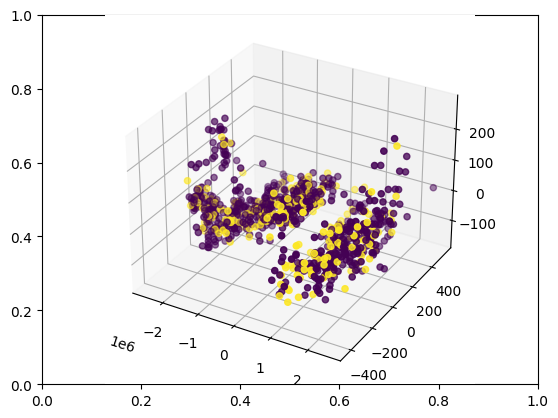

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

small_example_df = allAsteroidDF.iloc[:1000, :-2]
#print(allAsteroidDF.iloc[:500, :-2])
principalComponents = pca.fit_transform(small_example_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalDf['principal component 1'].size)

fig, ax = plt.subplots()
ax.set_xlabel = tag1
ax.set_ylabel = tag2
ax = plt.axes(projection='3d')
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], c = predictions[:1000])



print(abs( pca.components_ ))
print(small_example_df.columns)
plt.draw()

In [136]:
resultDF = pd.DataFrame(columns = small_example_df.columns)
print(small_example_df.columns)
for i in range(len(small_example_df.columns)):
    temp = []
    #print(abs( pca.components_ )[0][i], abs( pca.components_ )[0][i])
    temp.append((abs( pca.components_ )[0][i] * pca.explained_variance_ratio_[0] + abs( pca.components_ )[1][i]) * pca.explained_variance_ratio_ * [1])
    resultDF[small_example_df.columns[i]] = temp

display(resultDF)

Index(['BIT_DEPTH', 'RATE_OF_PENETRATION', 'HOOK_LOAD',
       'DIFFERENTIAL_PRESSURE', 'WEIGHT_ON_BIT', 'DRILL_BIT_ID',
       'DRILL_BIT_NAME', 'Distances', 'totalDistance', 'Time', 'totalTime',
       'asteroid', 'cost', 'totalCost'],
      dtype='object')


BIT_DEPTH  \
0  [0.0002939497711517143, 3.4596481133385065e-12...   

                                 RATE_OF_PENETRATION  \
0  [0.0246563526779222, 2.901934697542454e-10, 5....   

                                           HOOK_LOAD  \
0  [0.02381692184212242, 2.803137705934865e-10, 5...   

                               DIFFERENTIAL_PRESSURE  \
0  [0.9991308675278906, 1.1759292097006189e-08, 2...   

                                       WEIGHT_ON_BIT     DRILL_BIT_ID  \
0  [0.02780898501331424, 3.272984433980578e-10, 6...  [0.0, 0.0, 0.0]   

    DRILL_BIT_NAME                                          Distances  \
0  [0.0, 0.0, 0.0]  [5.3544891017044005e-06, 6.301977390906768e-14...   

                                       totalDistance  \
0  [0.0002939497711518589, 3.459648113340208e-12,...   

                                                Time  \
0  [7.993841326324523e-08, 9.40836863202461e-16, ...   

                                           totalTime         asteroid  \
0  [5.890874649014881e-05, 6.933277507081029e-13,...  [0.0, 0.0, 0.0]   

                                                cost  \
0  [8.031733652515405e-06, 9.452966086311669e-14,...   

                                           totalCost  
0  [1.0001054187965934, 1.1770762098989553e-08, 2...